In [56]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [57]:
#Opening Json Data
with open('states_daily.json') as f:
    states_daily = json.load(f)

In [58]:
#Preparing Data Frame
print(states_daily['states_daily'][0].keys())
#Getting Columns
columnNames = list(states_daily['states_daily'][0].keys())
print(columnNames)
len(states_daily['states_daily'])
#Getting Each Instanes
rows = [list(states_daily['states_daily'][i].values()) for i in range(len(states_daily['states_daily']))]
rowsArray = np.array(rows)
dataframe = pd.DataFrame(data= rowsArray, columns= columnNames)
dataframe.head(5)

dict_keys(['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'date', 'dd', 'dl', 'dn', 'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh', 'ml', 'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk', 'status', 'tg', 'tn', 'tr', 'tt', 'un', 'up', 'ut', 'wb'])
['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'date', 'dd', 'dl', 'dn', 'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh', 'ml', 'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk', 'status', 'tg', 'tn', 'tr', 'tt', 'un', 'up', 'ut', 'wb']


,an,ap,ar,as,br,ch,ct,date,dd,dl,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,...,0,Recovered,1,0,0,4,0,0,0,0


In [59]:
#Preprocessing of Data
arr = columnNames[0:]
arr.remove('date')
arr.remove('status')
for item in arr:
    dataframe[item] = dataframe[item].astype(int)

dataframe['date'] = pd.to_datetime(dataframe['date'])
filterStatusConfirmed = dataframe.loc[dataframe['status'] == 'Confirmed']
filterStatusRecovered = dataframe.loc[dataframe['status'] == 'Recovered']
filterStatusDeceased = dataframe.loc[dataframe['status'] == 'Deceased']
union_terr=['dl','an','jk','la','dn','py','cg','ld',] 
state=[]
for item in arr:
    if item in union_terr or item=='un' or item=='dd' or item=='tt':
        continue
    state.append(item)
print(state)
print(arr)
#filterStatusDeceased.head(5)

['ap', 'ar', 'as', 'br', 'ch', 'ct', 'ga', 'gj', 'hp', 'hr', 'jh', 'ka', 'kl', 'mh', 'ml', 'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'rj', 'sk', 'tg', 'tn', 'tr', 'up', 'ut', 'wb']
['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'dd', 'dl', 'dn', 'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh', 'ml', 'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk', 'tg', 'tn', 'tr', 'tt', 'un', 'up', 'ut', 'wb']


In [60]:
#Answer1_1  (If we get date from user and pass that date while comparing it is genralized)
marchToSept1_Confirmed = filterStatusConfirmed[(filterStatusConfirmed['date'] >= '2020-03-14') & (filterStatusConfirmed['date'] <= '2020-09-05')]
marchToSept1_Recovered= filterStatusRecovered[(filterStatusRecovered['date'] >= '2020-03-14') & (filterStatusRecovered['date'] <= '2020-09-05')]
marchToSept1_Deceased = filterStatusDeceased[(filterStatusDeceased['date'] >= '2020-03-14') & (filterStatusDeceased['date'] <= '2020-09-05')]
print("Confirmed:{0} \nRecovered : {1}\nDeceased : {2}".format(marchToSept1_Confirmed['tt'].sum() , marchToSept1_Recovered['tt'].sum() , marchToSept1_Deceased['tt'].sum() ))

Confirmed:4110211 
Recovered : 3177666
Deceased : 70094


In [61]:
#Answer1_2
print("Confirmed:{0} \nRecovered : {1}\nDeceased : {2}".format(marchToSept1_Confirmed['dl'].sum() , marchToSept1_Recovered['dl'].sum() , marchToSept1_Deceased['dl'].sum() ))

Confirmed:188193 
Recovered : 163785
Deceased : 4538


In [62]:
#Answer1_3
print(" Total Confirmed Cases in Delhi and Maharashtra  = {}".format(marchToSept1_Confirmed['dl'].sum() + marchToSept1_Confirmed['mh'].sum()))
print(" Total Recovered Cases in Delhi and Maharashtra  = {}".format(marchToSept1_Recovered['dl'].sum() + marchToSept1_Recovered['mh'].sum()))
print(" Total Deceased Cases in Delhi and Maharashtra  = {}".format(marchToSept1_Deceased['dl'].sum() + marchToSept1_Deceased['mh'].sum()))



Total Confirmed Cases in Delhi and Maharashtra  = 1072055
 Total Recovered Cases in Delhi and Maharashtra  = 800359
 Total Deceased Cases in Delhi and Maharashtra  = 30813


In [63]:
#Answer 1_4

max1 = 0
max2 = 0
max3 = 0

state_conf = ''
state_rec = ''
state_dec = ''
for item in arr:
    if item=='tt' or item in union_terr or item== 'un':
        continue
    count_conf = marchToSept1_Confirmed[item].sum()
    count_rec = marchToSept1_Recovered[item].sum()
    count_dec = marchToSept1_Deceased[item].sum()
    if count_conf > max1:
        max1 = count_conf
        state_conf = item
    if count_rec > max2:
        max2 = count_rec
        state_rec = item
    if count_dec > max3:
        max3 = count_dec
        state_dec = item
print("Highest Infected State is '{0}'' with total number of Confirmed cases {1}".format(state_conf,max1))
print("Highest Recovered Person State is '{0}'' with total number of Recoverd cases {1}".format(state_rec,max2))
print("Highest Infected State is '{0}' with total number of Deac cases {1}".format(state_dec,max3))



Highest Infected State is 'mh'' with total number of Confirmed cases 883862
Highest Recovered Person State is 'mh'' with total number of Recoverd cases 636574
Highest Infected State is 'mh' with total number of Deac cases 26275


In [64]:
#Answer 1_5
min1 = float('inf')
min2 = float('inf')
min3 = float('inf')
arr.remove('dd') # Daman and Diu will merge into Dadra and Nagar Haveli
l_state_conf = ''
l_state_rec = ''
l_state_dec = ''
for item in arr:
    if item =='tt' or item in union_terr or item =='un':
        continue
    count_conf = marchToSept1_Confirmed[item].sum()
    count_rec = marchToSept1_Recovered[item].sum()
    count_dec = marchToSept1_Deceased[item].sum()
    if count_conf < min1:
        min1 = count_conf
        l_state_conf = item
    if count_rec < min2:
        min2 = count_rec
        l_state_rec = item
    if count_dec < min3:
        min3 = count_dec
        l_state_dec = item

print("Lowest Infected State is '{0}'' with total number of Confirmed cases {1}".format(l_state_conf,min1))
print("Lowest Recovered Person's State is '{0}'' with total number of Recoverd cases {1}".format(l_state_rec,min2))
print("Lowest Infected State is '{0}' with total number of Deac cases {1}".format(l_state_dec,min3))

Lowest Infected State is 'mz'' with total number of Confirmed cases 1062
Lowest Recovered Person's State is 'mz'' with total number of Recoverd cases 713
Lowest Infected State is 'mz' with total number of Deac cases 0


In [65]:

#Answer 1_6
index_max_con=marchToSept1_Confirmed['dl'].idxmax()
index_max_rec=marchToSept1_Recovered['dl'].idxmax()
index_max_dec=marchToSept1_Deceased['dl'].idxmax()

date_conf=marchToSept1_Confirmed.at[index_max_con,'date']
date_conf=date_conf.date()
date_rec=marchToSept1_Recovered.at[index_max_rec,'date']
date_rec=date_rec.date()
date_dec=marchToSept1_Deceased.at[index_max_dec,'date']
date_dec=date_dec.date()


print("Highest Number of Confirmed cases in a Single day in Delhi is {0} on {1}".format(marchToSept1_Confirmed['dl'].max(),date_conf))
print("Highest Number of Recovered cases in a Single day in Delhi is {0} on {1}".format(marchToSept1_Recovered['dl'].max(),date_rec))
print("Highest Number of Deceased cases in a Single day in Delhi is {0} on {1}".format(marchToSept1_Deceased['dl'].max(),date_dec))

Highest Number of Confirmed cases in a Single day in Delhi is 3947 on 2020-06-23
Highest Number of Recovered cases in a Single day in Delhi is 7725 on 2020-06-20
Highest Number of Deceased cases in a Single day in Delhi is 437 on 2020-06-16


In [66]:
#answer 1_7
print(state)
for s in state:
    sum_conf = marchToSept1_Confirmed[s].sum()
    sum_rec = marchToSept1_Recovered[s].sum()
    sum_dec = marchToSept1_Deceased[s].sum()
    active=sum_conf -(sum_rec + sum_dec)
    print(" '{0}' :: {1} ".format(s,active))

    

['ap', 'ar', 'as', 'br', 'ch', 'ct', 'ga', 'gj', 'hp', 'hr', 'jh', 'ka', 'kl', 'mh', 'ml', 'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'rj', 'sk', 'tg', 'tn', 'tr', 'up', 'ut', 'wb']
 'ap' :: 100880 
 'ar' :: 1525 
 'as' :: 28404 
 'br' :: 16735 
 'ch' :: 2143 
 'ct' :: 22320 
 'ga' :: 4945 
 'gj' :: 16266 
 'hp' :: 2023 
 'hr' :: 14912 
 'jh' :: 14980 
 'ka' :: 100224 
 'kl' :: 21867 
 'mh' :: 221013 
 'ml' :: 1374 
 'mn' :: 1872 
 'mp' :: 15687 
 'mz' :: 349 
 'nl' :: 701 
 'or' :: 25856 
 'pb' :: 15870 
 'rj' :: 14996 
 'sk' :: 561 
 'tg' :: 32405 
 'tn' :: 51580 
 'tr' :: 5905 
 'up' :: 59963 
 'ut' :: 7649 
 'wb' :: 23390 


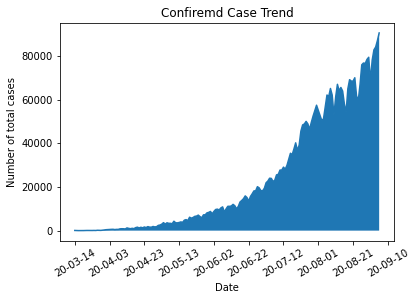

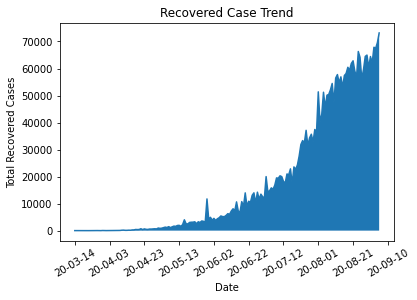

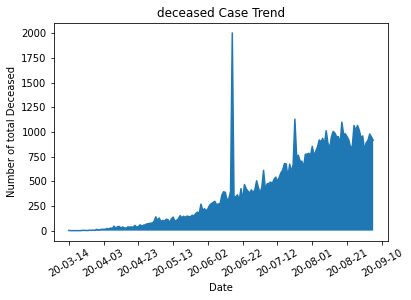

In [139]:
#Answer 2_1
from datetime import date, timedelta
import matplotlib.dates as mdates
graph_confirm = filterStatusConfirmed[(filterStatusConfirmed['date'] >= '2020-03-14') & (filterStatusConfirmed['date'] <= '2020-09-05')]
x_value_c=graph_confirm['date'].to_numpy()
#print(x_value)
y_value_c=graph_confirm['tt'].to_numpy()
plt.title('Confiremd Case Trend')
plt.xlabel('Date')
plt.ylabel('Number of total cases')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.xticks(rotation=30)
plt.plot(x_value_c,y_value_c)
# plt.plot_date(x_value_c, y_value_c ,label="Scatter plot")
plt.fill_between(x_value_c,0,y_value_c)
plt.show()

#Recovered
graph_recover = filterStatusRecovered[(filterStatusRecovered['date'] >= '2020-03-14') & (filterStatusRecovered['date'] <= '2020-09-05')]
x_value_r=graph_recover['date'].to_numpy()
#print(x_value)
y_value_r=graph_recover['tt'].to_numpy()
plt.title('Recovered Case Trend')
plt.xlabel('Date')
plt.ylabel('Total Recovered Cases')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.xticks(rotation=30)
# plt.plot_date(x_value_r, y_value_r ,label="Scatter plot")
plt.plot(x_value_r,y_value_r)
plt.fill_between(x_value_r,0,y_value_r)
plt.show()

#Deceased
graph_deceased = filterStatusDeceased[(filterStatusDeceased['date'] >= '2020-03-14') & (filterStatusDeceased['date'] <= '2020-09-05')]
x_value_d=graph_deceased['date'].to_numpy()
#print(x_value)
y_value_d=graph_deceased['tt'].to_numpy()
plt.title('deceased Case Trend')
plt.xlabel('Date')
plt.ylabel('Number of total Deceased')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.xticks(rotation=30)
plt.plot(x_value_d,y_value_d)
# plt.plot_date(x_value_d, y_value_d ,label="Scatter plot")
plt.fill_between(x_value_d,0,y_value_d)
plt.show()


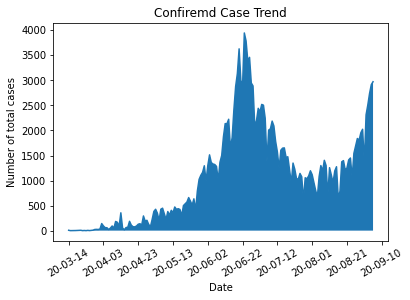

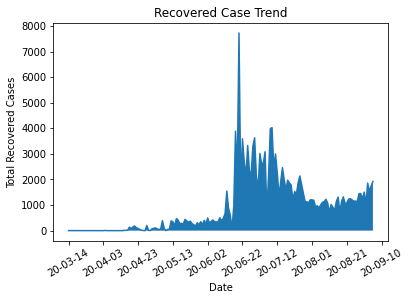

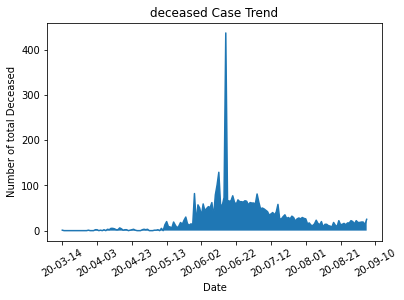

In [140]:
#Answer 2_2
from datetime import date, timedelta
import matplotlib.dates as mdates
graph_confirm = filterStatusConfirmed[(filterStatusConfirmed['date'] >= '2020-03-14') & (filterStatusConfirmed['date'] <= '2020-09-05')]
x_value_c=graph_confirm['date'].to_numpy()
#print(x_value)
y_value_c=graph_confirm['dl'].to_numpy()
plt.title('Confiremd Case Trend')
plt.xlabel('Date')
plt.ylabel('Number of total cases')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.xticks(rotation=30)
plt.plot(x_value_c,y_value_c)
# plt.plot_date(x_value_c, y_value_c ,label="Scatter plot")
plt.fill_between(x_value_c,0,y_value_c)
plt.show()

#Recovered
graph_recover = filterStatusRecovered[(filterStatusRecovered['date'] >= '2020-03-14') & (filterStatusRecovered['date'] <= '2020-09-05')]
x_value_r=graph_recover['date'].to_numpy()
#print(x_value)
y_value_r=graph_recover['dl'].to_numpy()
plt.title('Recovered Case Trend')
plt.xlabel('Date')
plt.ylabel('Total Recovered Cases')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.xticks(rotation=30)
plt.plot(x_value_r,y_value_r)
# plt.plot_date(x_value_r, y_value_r ,label="Scatter plot")
plt.fill_between(x_value_r,0,y_value_r)
plt.show()

#Deceased
graph_deceased = filterStatusDeceased[(filterStatusDeceased['date'] >= '2020-03-14') & (filterStatusDeceased['date'] <= '2020-09-05')]
x_value_d=graph_deceased['date'].to_numpy()
#print(x_value)
y_value_d=graph_deceased['dl'].to_numpy()
plt.title('deceased Case Trend')
plt.xlabel('Date')
plt.ylabel('Number of total Deceased')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.xticks(rotation=30)
plt.plot(x_value_d, y_value_d)
plt.fill_between(x_value_d,0,y_value_d)
plt.show()


[70, 93, 107, 116, 153, 174, 229, 307, 371, 459, 517, 603, 656, 791, 920, 1022, 1147, 1435, 1834, 2284, 2792, 3302, 3846, 4249, 4719, 5168, 5865, 6563, 7191, 7793, 8897, 9724, 10439, 11216, 11827, 12737, 13891, 14678, 15459, 16321, 17306, 18171, 19520, 20486, 21416, 22613, 23557, 24654, 26011, 27652, 29553, 32024, 33572, 35922, 37687, 39818, 41464, 43994, 45926, 47463, 49089, 51389, 52859, 53521, 55880, 57895, 60871, 63344, 66088, 69202, 73147, 76817, 80069, 82218, 85842, 89749, 89749, 93605, 97244, 100884, 104943, 110584, 115767, 120183, 124861, 130291, 133385, 137460, 141983, 146680, 150335, 153973, 157696, 157696, 159552, 165429, 168174, 173419, 175055, 180705, 183074, 187800, 191155, 194976, 202604, 208103, 215698, 220123, 225308, 232235, 233805, 241662, 250323, 258015, 264727, 270559, 276120, 282023, 288976, 296209, 306617, 316571, 324924, 336271, 348192, 364860, 378145, 394975, 406882, 417792, 430388, 444750, 460361, 472605, 489321, 500809, 513983, 532801, 549560, 569728, 572623,

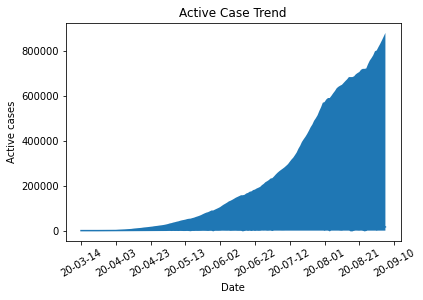

In [153]:

#Answer 2-3 Using Commulative
from datetime import date, timedelta
import matplotlib.dates as mdates
g_Confirmed = filterStatusConfirmed[(filterStatusConfirmed['date'] >= '2020-03-14') & (filterStatusConfirmed['date'] <= '2020-09-05')]
g_Recovered= filterStatusRecovered[(filterStatusRecovered['date'] >= '2020-03-14') & (filterStatusRecovered['date'] <= '2020-09-05')]
g_Deceased = filterStatusDeceased[(filterStatusDeceased['date'] >= '2020-03-14') & (filterStatusDeceased['date'] <= '2020-09-05')]
x_value_c=g_Confirmed['date'].to_numpy()
#print(x_value)
y_c=g_Confirmed['tt'].tolist()
y_r=g_Recovered['tt'].tolist()
y_d=g_Deceased['tt'].tolist()
y_value=[]
y_graph_value=[]
#print(y_c)
for (a,b,c) in zip(y_c,y_r,y_d):
    z= (a - (b + c))
    if(z<0):
        y_value.append(0) # not sure why some value is zero
    else:
        y_value.append(z)
y_value=np.array(y_value) 
temp=0
for i in range(len(y_value)):
    temp+=y_value[i]
    y_graph_value.append(temp)
print(y_graph_value)


print(len(y_value))
# print(x_value_c)
plt.title('Active Case Trend')
plt.xlabel('Date')
plt.ylabel('Active cases')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.xticks(rotation=30)
plt.plot(x_value,y_value)
#plt.plot_date(x_value, y_value )
plt.fill_between(x_value,0,y_graph_value)
plt.show()


[70, 93, 107, 116, 153, 174, 229, 307, 371, 459, 517, 603, 656, 791, 920, 1022, 1147, 1435, 1834, 2284, 2792, 3302, 3846, 4249, 4719, 5168, 5865, 6563, 7191, 7793, 8897, 9724, 10439, 11216, 11827, 12737, 13891, 14678, 15459, 16321, 17306, 18171, 19520, 20486, 21416, 22613, 23557, 24654, 26011, 27652, 29553, 32024, 33572, 35922, 37687, 39818, 41464, 43994, 45926, 47463, 49089, 51389, 52859, 53521, 55880, 57895, 60871, 63344, 66088, 69202, 73147, 76817, 80069, 82218, 85842, 89749, 89749, 93605, 97244, 100884, 104943, 110584, 115767, 120183, 124861, 130291, 133385, 137460, 141983, 146680, 150335, 153973, 157696, 157696, 159552, 165429, 168174, 173419, 175055, 180705, 183074, 187800, 191155, 194976, 202604, 208103, 215698, 220123, 225308, 232235, 233805, 241662, 250323, 258015, 264727, 270559, 276120, 282023, 288976, 296209, 306617, 316571, 324924, 336271, 348192, 364860, 378145, 394975, 406882, 417792, 430388, 444750, 460361, 472605, 489321, 500809, 513983, 532801, 549560, 569728, 572623,

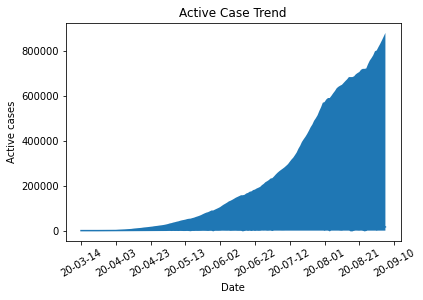

In [152]:

#tempoerar
from datetime import date, timedelta
import matplotlib.dates as mdates
g_Confirmed = filterStatusConfirmed[(filterStatusConfirmed['date'] >= '2020-03-14') & (filterStatusConfirmed['date'] <= '2020-09-05')]
g_Recovered= filterStatusRecovered[(filterStatusRecovered['date'] >= '2020-03-14') & (filterStatusRecovered['date'] <= '2020-09-05')]
g_Deceased = filterStatusDeceased[(filterStatusDeceased['date'] >= '2020-03-14') & (filterStatusDeceased['date'] <= '2020-09-05')]
x_value_c=g_Confirmed['date'].to_numpy()
#print(x_value)
y_c=g_Confirmed['tt'].tolist()
y_r=g_Recovered['tt'].tolist()
y_d=g_Deceased['tt'].tolist()
y_value=[]
y_graph_value=[]
#print(y_c)
for (a,b,c) in zip(y_c,y_r,y_d):
    z= (a - (b + c))
    if(z<0):
        y_value.append(0) # not sure why some value is zero
    else:
        y_value.append(z)
y_value=np.array(y_value) 
temp=0
for i in range(len(y_value)):
    temp+=y_value[i]
    y_graph_value.append(temp)
print(y_graph_value)


print(len(y_value))
# print(x_value_c)
plt.title('Active Case Trend')
plt.xlabel('Date')
plt.ylabel('Active cases')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.xticks(rotation=30)
plt.plot(x_value,y_value)
#plt.plot_date(x_value, y_value )
plt.fill_between(x_value,0,y_graph_value)
plt.show()
